# Twitter Sentiment Analysis

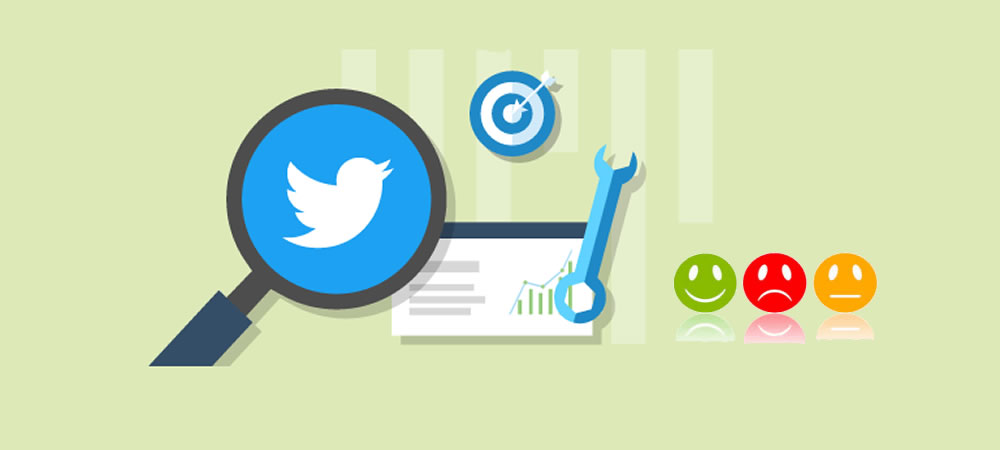

### Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import nltk
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,TweetTokenizer
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence #unique id

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout, Embedding,LSTM
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PUJA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PUJA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PUJA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Reading DataFrame

In [2]:
df=pd.read_csv("twitter_training.csv",header= None,names=['id','information','sentiment','text'])
df.head()

,id,information,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
df.describe(include=object)

,information,sentiment,text
count,74682,74682,73996
unique,32,4,69491
top,TomClancysRainbowSix,Negative,"At the same time, despite the fact that there ..."
freq,2400,22542,172


### Dataframe info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           74682 non-null  int64 
 1   information  74682 non-null  object
 2   sentiment    74682 non-null  object
 3   text         73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


### Checking for Nan Values

In [5]:
df.text.isnull().sum()

686

In [6]:
df.dropna(inplace=True,axis=0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73996 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           73996 non-null  int64 
 1   information  73996 non-null  object
 2   sentiment    73996 non-null  object
 3   text         73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


## Exploratory Data Analysis

### id

In [8]:
df.id.unique()

array([2401, 2402, 2403, ..., 9198, 9199, 9200], dtype=int64)

In [9]:
df.id.nunique()

12447

### Sentiment

In [10]:
df.sentiment.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [11]:
df.sentiment.value_counts()

Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: sentiment, dtype: int64

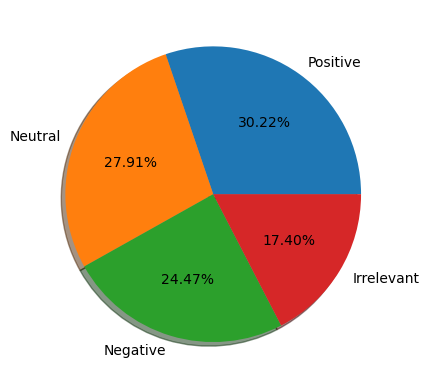

In [12]:
plt.pie(df.sentiment.value_counts(),autopct="%1.2f%%",shadow=True,labels=df.sentiment.unique());

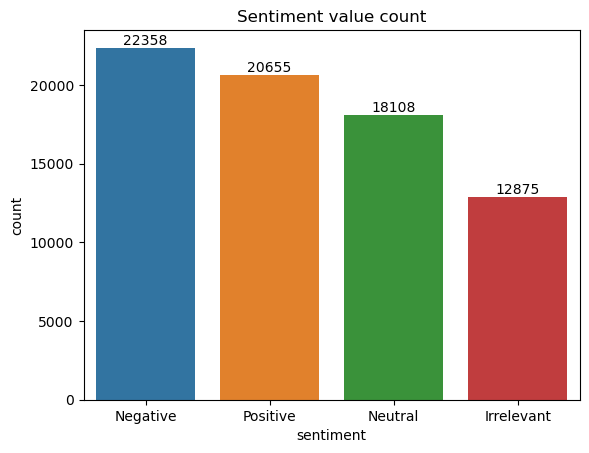

In [13]:
ax=sns.countplot(data=df,x='sentiment',order=df.sentiment.value_counts().index)
plt.title("Sentiment value count")


for container in ax.containers:
    ax.bar_label(container)

## Information

In [21]:
df['information'].nunique()

32

In [17]:
df['information'].value_counts()

MaddenNFL                            2377
LeagueOfLegends                      2377
CallOfDuty                           2376
Verizon                              2365
TomClancysRainbowSix                 2364
Facebook                             2362
Microsoft                            2361
Dota2                                2359
WorldOfCraft                         2357
ApexLegends                          2353
NBA2K                                2343
CallOfDutyBlackopsColdWar            2343
FIFA                                 2324
johnson&johnson                      2324
TomClancysGhostRecon                 2321
Battlefield                          2316
Overwatch                            2316
GrandTheftAuto(GTA)                  2293
HomeDepot                            2292
PlayStation5(PS5)                    2291
Hearthstone                          2286
CS-GO                                2284
Xbox(Xseries)                        2283
Borderlands                       

<Axes: xlabel='count', ylabel='information'>

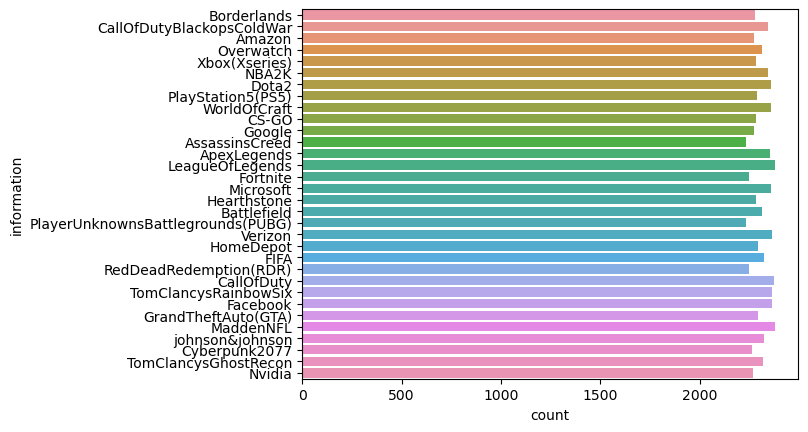

In [16]:
sns.countplot(data=df,y="information")

In [22]:
df.groupby('information')[['sentiment']].value_counts().head(10)

information     sentiment 
Amazon          Neutral       1207
                Negative       575
                Positive       308
                Irrelevant     186
ApexLegends     Neutral        936
                Positive       634
                Negative       591
                Irrelevant     192
AssassinsCreed  Positive      1439
                Negative       375
dtype: int64

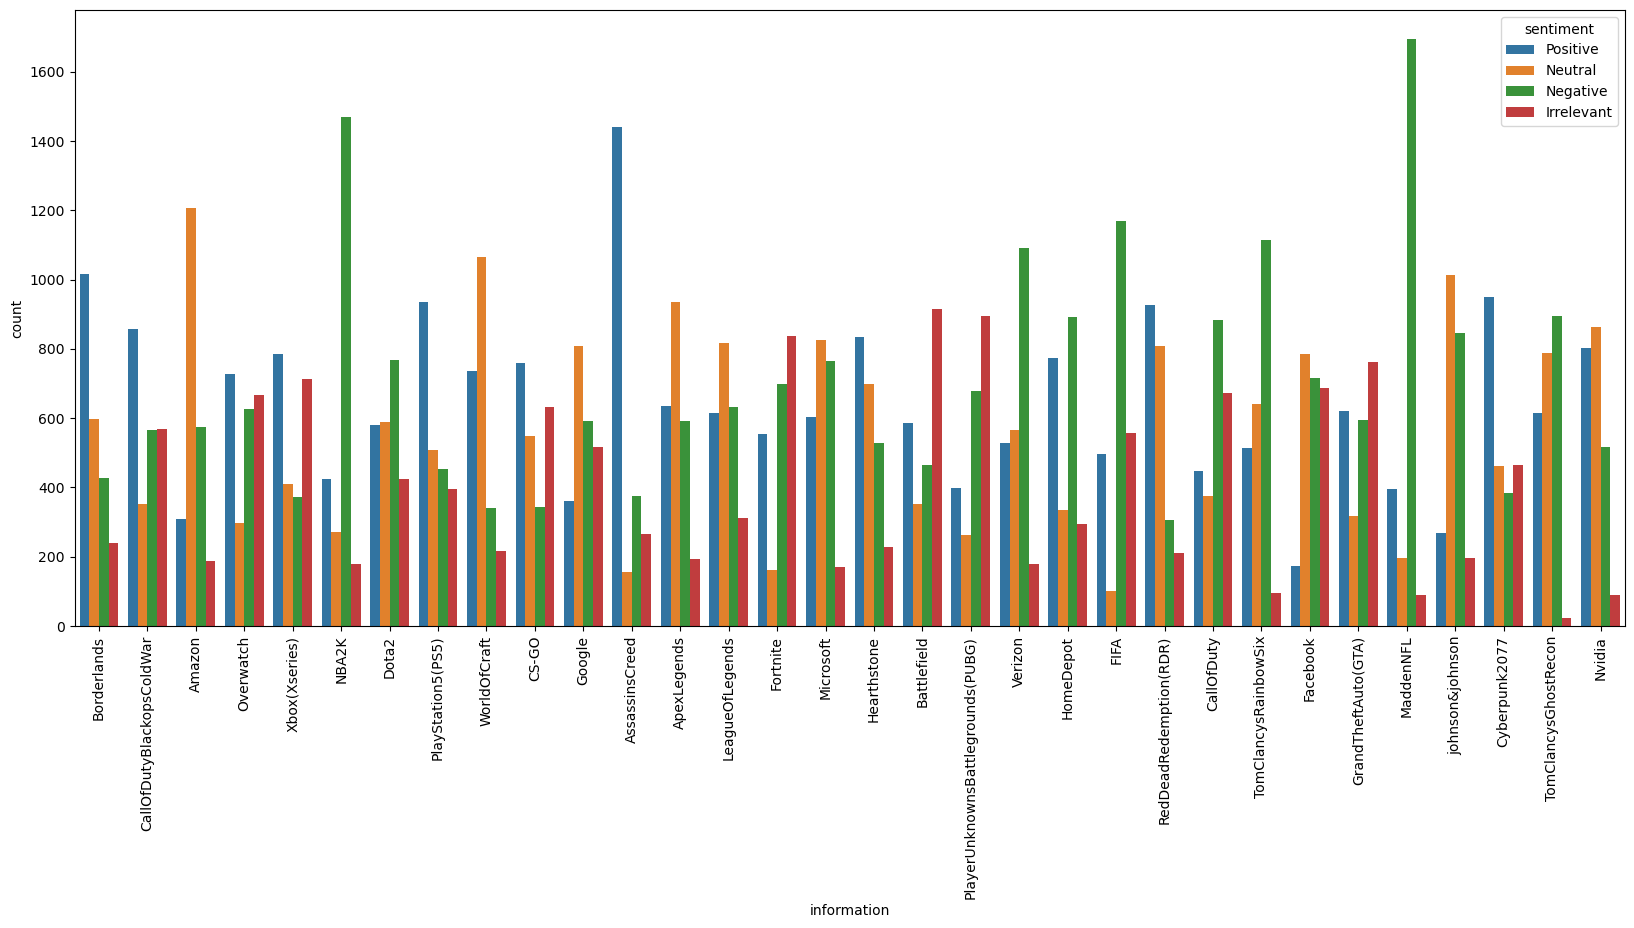

In [23]:
plt.figure(figsize=(20,8))
sns.countplot(data=df,x='information',hue='sentiment')
plt.xticks(rotation=90);

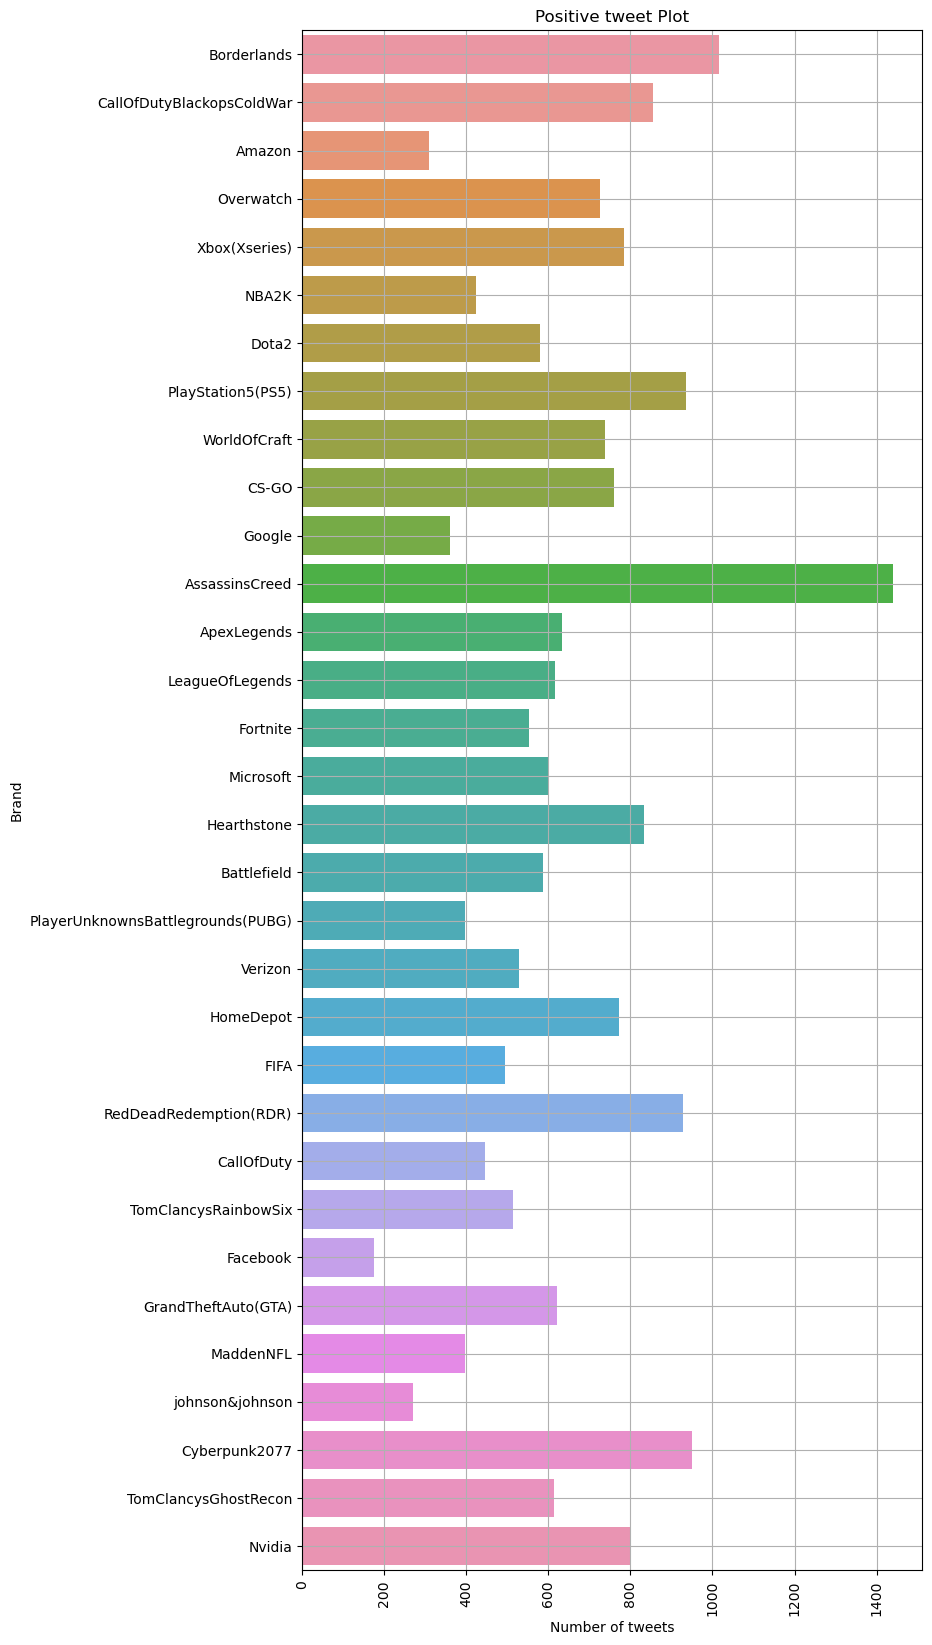

In [37]:

plt.figure(figsize=(8,20))
sns.countplot(data=df[df['sentiment']=='Positive'],y="information")

plt.xticks(rotation=90)
plt.ylabel("Brand")
plt.xlabel("Number of tweets")
plt.grid()
plt.title("Positive tweet Plot");

Text(0.5, 1.0, 'Negative tweet Plot')

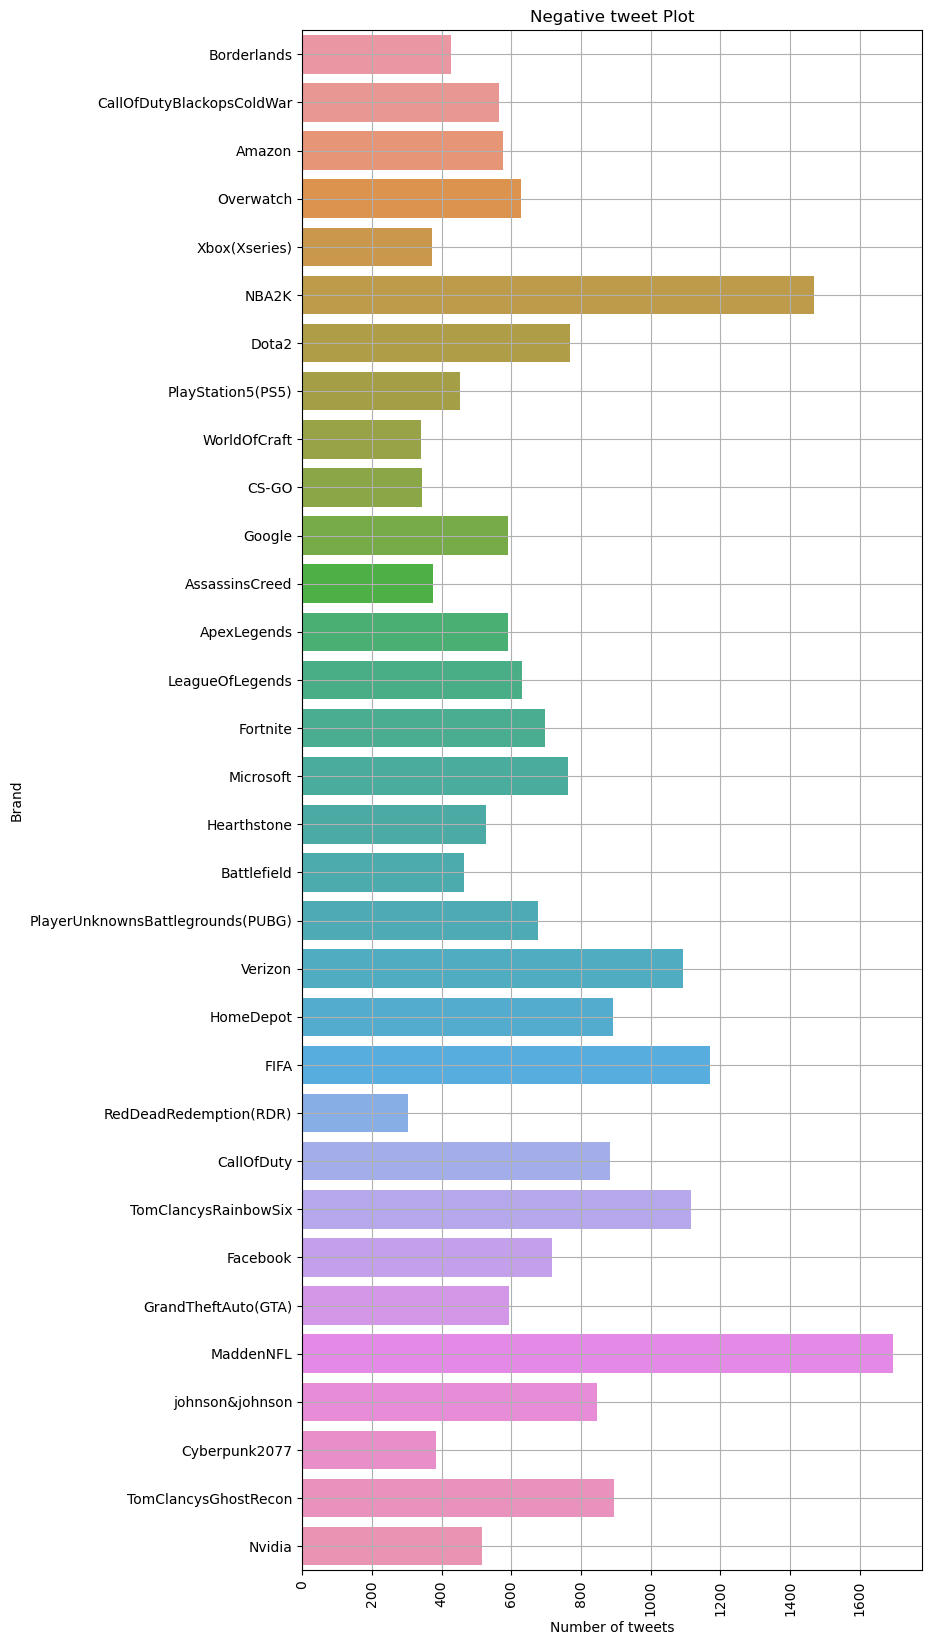

In [38]:

plt.figure(figsize=(8,20))
sns.countplot(data=df[df['sentiment']=='Negative'],y="information")

plt.xticks(rotation=90)
plt.ylabel("Brand")
plt.xlabel("Number of tweets")
plt.grid()
plt.title("Negative tweet Plot")

### Checking for any bankspce in text Column

In [43]:
str_anull=[]
for indx,ids,info,lbl,msg in df.itertuples():
    #print(msg)
    if type(msg)==str:
        if len(msg)==0:
        str_anull.append(indx)

In [44]:
str_anull

[]

In [48]:
df.head()

,id,information,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


# @@Pipeline of natural language processing

### Step 1: Sentence segmentation
###       ->1a: Case Coversion(Lower or Upper Case)
### Step 2: Word tokenization
###      -> 2a:Punctuation Removal
### Step 3: Stemming/ Lemmatization
### Step 4: Stop word analysis

https://www.nltk.org/api/nltk.tokenize.casual.html

https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

In [49]:
tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)

In [50]:
def cleantext(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@[A-Za-z0-9()]+','',text)
    tokens = tknzr.tokenize(text.lower())
    ftoken = [t for t in tokens if(t.isalpha())]
    stop = stopwords.words("english")
    ctoken = [t for t in ftoken if(t not in stop)]
    lemma = WordNetLemmatizer()
    ltoken = [lemma.lemmatize(t) for t in ctoken]
    return " ".join(ltoken)

In [51]:
df["clean_text"]=df["text"].transform(lambda text: cleantext(text))

In [108]:
#df["clean_text"]=df["text"].apply(cleantext)

In [109]:
#df['clean_text']=df['clean_text'].apply(lambda x: re.sub(r'@[A-Za-z0-9]+','',x))

In [110]:
#df['clean_text']=df['clean_text'].apply(lambda x: re.sub(r'http\S+','',x))

In [52]:
df['clean_text'].head(10)

0                         im getting borderland murder
1                                   coming border kill
2                           im getting borderland kill
3                          im coming borderland murder
4                         im getting borderland murder
5                         im getting borderland murder
6    spent hour making something fun know huge fan ...
7    spent couple hour something fun know huge bord...
8    spent hour something fun know huge borderland ...
9    spent hour making something fun know huge rhan...
Name: clean_text, dtype: object

In [53]:
for i in df['text'].values[0:10]:
    print(i)

im getting on borderlands and i will murder you all ,
I am coming to the borders and I will kill you all,
im getting on borderlands and i will kill you all,
im coming on borderlands and i will murder you all,
im getting on borderlands 2 and i will murder you me all,
im getting into borderlands and i can murder you all,
So I spent a few hours making something for fun. . . If you don't know I am a HUGE @Borderlands fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . Here is the original image versus the creation I made :) Enjoy! pic.twitter.com/mLsI5wf9Jg
So I spent a couple of hours doing something for fun... If you don't know that I'm a huge @ Borderlands fan and Maya is one of my favorite characters, I decided to make a wallpaper for my PC.. Here's the original picture compared to the creation I made:) Have fun! pic.twitter.com / mLsI5wf9Jg
So I spent a few hours doing something for fun... If you don't know I'm a HUGE @ Borderlands fan a

In [54]:
for i in df['clean_text'].values[0:10]:
    print(i)

im getting borderland murder
coming border kill
im getting borderland kill
im coming borderland murder
im getting borderland murder
im getting borderland murder
spent hour making something fun know huge fan maya one favorite character decided make wallpaper pc original image versus creation made enjoy
spent couple hour something fun know huge borderland fan maya one favorite character decided make wallpaper pc original picture compared creation made fun mlsi
spent hour something fun know huge borderland fan maya one favorite character
spent hour making something fun know huge rhandlerr fan maya one favorite character decided make wallpaper pc original image versus creation made enjoy


In [55]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df['sentiment']=oe.fit_transform(df[['sentiment']])

In [56]:
oe.categories_

[array(['Irrelevant', 'Negative', 'Neutral', 'Positive'], dtype=object)]

In [57]:
df.head()

,id,information,sentiment,text,clean_text
0,2401,Borderlands,3.0,im getting on borderlands and i will murder yo...,im getting borderland murder
1,2401,Borderlands,3.0,I am coming to the borders and I will kill you...,coming border kill
2,2401,Borderlands,3.0,im getting on borderlands and i will kill you ...,im getting borderland kill
3,2401,Borderlands,3.0,im coming on borderlands and i will murder you...,im coming borderland murder
4,2401,Borderlands,3.0,im getting on borderlands 2 and i will murder ...,im getting borderland murder


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73996 entries, 0 to 74681
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           73996 non-null  int64  
 1   information  73996 non-null  object 
 2   sentiment    73996 non-null  float64
 3   text         73996 non-null  object 
 4   clean_text   73996 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 3.4+ MB


In [59]:
x=df['clean_text']
y=df['sentiment']

In [60]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=1,stratify=y)

In [61]:
sentlen = []

for sent in df["clean_text"]:
    sentlen.append(len(word_tokenize(sent)))

df["SentLen"] = sentlen 
df.head()

,id,information,sentiment,text,clean_text,SentLen
0,2401,Borderlands,3.0,im getting on borderlands and i will murder yo...,im getting borderland murder,4
1,2401,Borderlands,3.0,I am coming to the borders and I will kill you...,coming border kill,3
2,2401,Borderlands,3.0,im getting on borderlands and i will kill you ...,im getting borderland kill,4
3,2401,Borderlands,3.0,im coming on borderlands and i will murder you...,im coming borderland murder,4
4,2401,Borderlands,3.0,im getting on borderlands 2 and i will murder ...,im getting borderland murder,4


In [127]:
df['SentLen'].describe()

count    73996.00000
mean         9.79380
std          7.34163
min          0.00000
25%          4.00000
50%          8.00000
75%         14.00000
max        163.00000
Name: SentLen, dtype: float64

Text(0.5, 1.0, 'Distribution of Sentence word count')

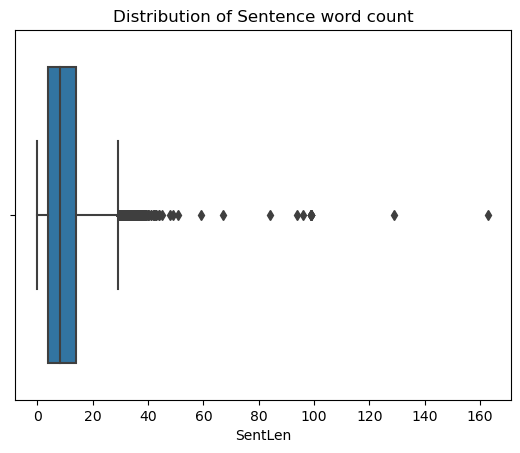

In [65]:
sns.boxplot(data=df,x='SentLen');
plt.title('Distribution of Sentence word count')

In [74]:
max_len=80
max_len

80

### Tokenizer

Tokenizer allows to vectorize a text corpus, by turning each text into either a sequence of integers (each integer being the index of a token in a dictionary) or into a vector where the coefficient for each token could be binary, based on word count

In [75]:
tok = Tokenizer(char_level=False, split=" ")#char_level	if True, every character will be treated as a token.

tok.fit_on_texts(xtrain)
tok.index_word

{1: 'game',
 2: 'like',
 3: 'get',
 4: 'one',
 5: 'play',
 6: 'good',
 7: 'time',
 8: 'love',
 9: 'really',
 10: 'new',
 11: 'u',
 12: 'people',
 13: 'johnson',
 14: 'shit',
 15: 'see',
 16: 'best',
 17: 'still',
 18: 'go',
 19: 'year',
 20: 'player',
 21: 'day',
 22: 'got',
 23: 'make',
 24: 'great',
 25: 'even',
 26: 'look',
 27: 'fucking',
 28: 'playing',
 29: 'fuck',
 30: 'xbox',
 31: 'dead',
 32: 'please',
 33: 'facebook',
 34: 'google',
 35: 'rhandlerr',
 36: 'back',
 37: 'much',
 38: 'amazon',
 39: 'know',
 40: 'red',
 41: 'guy',
 42: 'fifa',
 43: 'going',
 44: 'would',
 45: 'microsoft',
 46: 'first',
 47: 'want',
 48: 'video',
 49: 'home',
 50: 'today',
 51: 'also',
 52: 'say',
 53: 'gta',
 54: 'fun',
 55: 'call',
 56: 'thing',
 57: 'ever',
 58: 'fix',
 59: 'team',
 60: 'bad',
 61: 'verizon',
 62: 'pubg',
 63: 'thank',
 64: 'work',
 65: 'never',
 66: 'world',
 67: 'wait',
 68: 'thanks',
 69: 'overwatch',
 70: 'think',
 71: 'battlefield',
 72: 'need',
 73: 'right',
 74: 'borderl

In [76]:
len(tok.index_word)

22212

In [77]:
vocab_len = len(tok.index_word)
vocab_len

22212

### ##Text to vector conversion

### Training data

In [78]:
seqtrain = tok.texts_to_sequences(xtrain)
seqtrain

[[105, 10, 76, 612, 23, 406, 242, 17, 14],
 [1726, 301, 407],
 [679, 14],
 [1696,
  311,
  42,
  1057,
  705,
  5,
  30,
  4,
  608,
  5,
  59,
  699,
  196,
  322,
  5,
  1748,
  2118,
  598,
  5,
  3,
  608,
  608,
  225,
  2864,
  1],
 [400, 27, 1537, 10878, 1308, 3569, 2865, 791, 2],
 [136, 186, 28, 4287, 53, 1275, 3715, 268, 28, 4288, 139],
 [105,
  96,
  398,
  441,
  427,
  1028,
  269,
  3079,
  13191,
  284,
  973,
  1,
  143,
  54,
  186,
  1473,
  16053,
  1233],
 [164, 3434, 2637, 426, 5541, 510, 133, 1515],
 [233, 119, 102, 1287, 153, 3570, 8776, 673, 1400, 10879, 124],
 [9, 574],
 [46, 7, 465, 619, 374, 433],
 [75, 16054, 157, 80, 1621, 8777, 43, 6589, 61],
 [8, 345, 585, 6590, 51, 8778, 397, 2025, 631],
 [852, 613, 79, 105, 1143, 105, 2638, 998],
 [503, 4069, 10880, 234, 301, 49, 101, 366, 4563, 23, 94, 1644, 51, 410],
 [349, 400, 14, 1, 1697, 14, 506, 620, 1333],
 [795, 1, 642, 305, 575, 635, 16055, 2207, 437, 565, 1038, 40, 31, 77, 71],
 [853, 279, 139, 68, 40, 31, 77,

### Zero Padding

In [79]:
seqmattrain = sequence.pad_sequences(seqtrain, maxlen= int(max_len)) 
seqmattrain

array([[   0,    0,    0, ...,  242,   17,   14],
       [   0,    0,    0, ..., 1726,  301,  407],
       [   0,    0,    0, ...,    0,  679,   14],
       ...,
       [   0,    0,    0, ..., 3424, 6162,   48],
       [   0,    0,    0, ...,  222,  391,  331],
       [   0,    0,    0, ...,    5,   48,    1]])

In [80]:
seqmattrain.shape

(51797, 80)

In [81]:
seqtest = tok.texts_to_sequences(xtest)
seqmattest = sequence.pad_sequences(seqtest, maxlen=int(max_len))

### RNN Model Building

In [82]:
rnn = Sequential()

rnn.add(Embedding(vocab_len+1,700, input_length=int(max_len), mask_zero=True))
rnn.add(SimpleRNN(units=128, activation="tanh"))
rnn.add(Dense(units=128, activation="relu"))
rnn.add(Dropout(0.2))
#rnn.add(Dense(units=38, activation="relu"))
rnn.add(Dense(units=4, activation="softmax"))

#optimizer = keras.optimizers.Adam(lr=0.02)
rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#callbacks = [LearningRateScheduler(lr_scheduler, verbose=1)]
rnn.fit(seqmattrain, ytrain, batch_size=512, epochs=10,validation_data=(seqmattest,ytest))

Epoch 1/10
102/102 [==============================] - 134s 1s/step - loss: 0.9397 - accuracy: 0.6133 - val_loss: 0.5781 - val_accuracy: 0.7847
Epoch 2/10
102/102 [==============================] - 120s 1s/step - loss: 0.3286 - accuracy: 0.8785 - val_loss: 0.4780 - val_accuracy: 0.8273
Epoch 3/10
102/102 [==============================] - 122s 1s/step - loss: 0.1878 - accuracy: 0.9286 - val_loss: 0.5325 - val_accuracy: 0.8286
Epoch 4/10
102/102 [==============================] - 123s 1s/step - loss: 0.1469 - accuracy: 0.9426 - val_loss: 0.5824 - val_accuracy: 0.8298
Epoch 5/10
102/102 [==============================] - 127s 1s/step - loss: 0.1296 - accuracy: 0.9480 - val_loss: 0.6262 - val_accuracy: 0.8281
Epoch 6/10
102/102 [==============================] - 122s 1s/step - loss: 0.1183 - accuracy: 0.9513 - val_loss: 0.6683 - val_accuracy: 0.8256
Epoch 7/10
102/102 [==============================] - 120s 1s/step - loss: 0.1209 - accuracy: 0.9503 - val_loss: 0.6820 - val_accuracy: 0.8233

In [83]:
df_error=pd.DataFrame(rnn.history.history)

In [84]:
df_error.head()

,loss,accuracy,val_loss,val_accuracy
0,0.939748,0.613259,0.578103,0.784675
1,0.328599,0.878506,0.477991,0.827290
2,0.187823,0.928625,0.532467,0.828596
3,0.146895,0.942641,0.582370,0.829767
4,0.129635,0.947951,0.626164,0.828100


<Axes: >

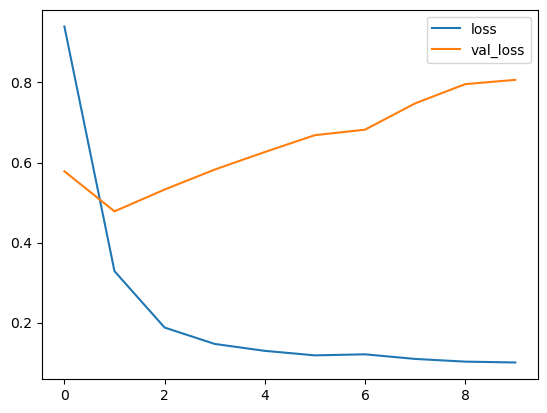

In [85]:
df_error[['loss','val_loss']].plot()
plt.xlabel('')

<Axes: >

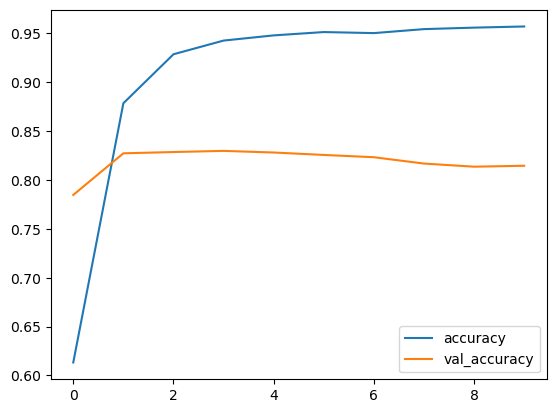

In [86]:
df_error[['accuracy','val_accuracy']].plot()

In [99]:
ypred = rnn.predict(seqmattest)

694/694 [==============================] - 82s 118ms/step


In [100]:
ypred

array([[1.39163750e-10, 9.99999940e-01, 1.95549132e-10, 8.86300455e-09],
       [1.69269964e-01, 2.44589910e-01, 2.89003462e-01, 2.97136784e-01],
       [4.04056948e-07, 8.83356250e-08, 9.99937236e-01, 6.22333391e-05],
       ...,
       [3.95318611e-10, 1.00000000e+00, 2.33999966e-08, 7.05909109e-09],
       [2.42803106e-03, 3.74596457e-05, 8.01011902e-06, 9.97526467e-01],
       [8.38031888e-01, 1.19851604e-01, 1.79094181e-03, 4.03255150e-02]],
      dtype=float32)

In [101]:
ytest

37578    1.0
61421    3.0
15       2.0
11573    2.0
18981    2.0
        ... 
13489    1.0
8994     3.0
37427    1.0
39574    3.0
56981    2.0
Name: sentiment, Length: 22199, dtype: float64

In [102]:
ypred1=ypred.argmax(axis=1)
ypred1

array([1, 3, 2, ..., 1, 3, 0], dtype=int64)

In [103]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

         0.0       0.83      0.76      0.80      3863
         1.0       0.84      0.84      0.84      6707
         2.0       0.82      0.78      0.80      5432
         3.0       0.77      0.84      0.81      6197

    accuracy                           0.81     22199
   macro avg       0.82      0.81      0.81     22199
weighted avg       0.82      0.81      0.81     22199



<Axes: >

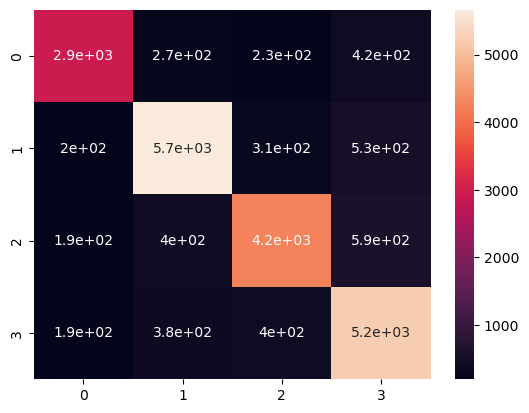

In [104]:
sns.heatmap(confusion_matrix(ytest,ypred1),annot=True)

# LMST

In [90]:
lstm = Sequential()

lstm.add(Embedding(vocab_len+1,700, input_length=int(max_len), mask_zero=True))
lstm.add(LSTM(units=128, activation="tanh"))
lstm.add(Dense(units=128, activation="relu"))
lstm.add(Dropout(0.2))

lstm.add(Dense(units=4, activation="softmax"))

lstm.compile(optimizer="adam", loss='sparse_categorical_crossentropy',metrics=['accuracy'])

lstm.fit(seqmattrain, ytrain, batch_size=128, epochs=10,validation_data=(seqmattest,ytest))

Epoch 1/10
405/405 [==============================] - 383s 920ms/step - loss: 0.8715 - accuracy: 0.6515 - val_loss: 0.6075 - val_accuracy: 0.7734
Epoch 2/10
405/405 [==============================] - 327s 808ms/step - loss: 0.4205 - accuracy: 0.8448 - val_loss: 0.4974 - val_accuracy: 0.8127
Epoch 3/10
405/405 [==============================] - 331s 817ms/step - loss: 0.2778 - accuracy: 0.8946 - val_loss: 0.5026 - val_accuracy: 0.8249
Epoch 4/10
405/405 [==============================] - 340s 839ms/step - loss: 0.2137 - accuracy: 0.9151 - val_loss: 0.5146 - val_accuracy: 0.8375
Epoch 5/10
405/405 [==============================] - 337s 832ms/step - loss: 0.1748 - accuracy: 0.9299 - val_loss: 0.5316 - val_accuracy: 0.8434
Epoch 6/10
405/405 [==============================] - 341s 843ms/step - loss: 0.1484 - accuracy: 0.9396 - val_loss: 0.5830 - val_accuracy: 0.8464
Epoch 7/10
405/405 [==============================] - 320s 789ms/step - loss: 0.1282 - accuracy: 0.9468 - val_loss: 0.6176 -

In [91]:
lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 80, 700)           15549100  
                                                                 
 lstm_1 (LSTM)               (None, 128)               424448    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 4)                 516       
                                                                 
Total params: 15,990,576
Trainable params: 15,990,576
Non-trainable params: 0
_________________________________________________________________


In [92]:
df_lossLSTM=pd.DataFrame(lstm.history.history)


<Axes: >

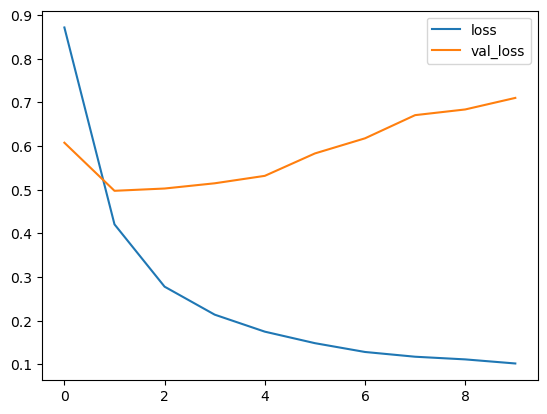

In [93]:
df_lossLSTM[['loss','val_loss']].plot()

<Axes: >

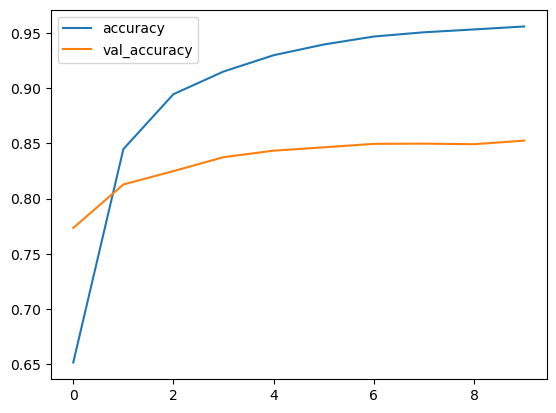

In [94]:
df_lossLSTM[['accuracy','val_accuracy']].plot()

In [95]:
ypred = lstm.predict(seqmattest)

694/694 [==============================] - 105s 145ms/step


In [96]:
ypred2=ypred.argmax(axis=1)
ypred2

array([1, 3, 2, ..., 1, 3, 0], dtype=int64)

In [97]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,ypred2))

              precision    recall  f1-score   support

         0.0       0.88      0.80      0.84      3863
         1.0       0.89      0.86      0.87      6707
         2.0       0.86      0.83      0.84      5432
         3.0       0.80      0.89      0.84      6197

    accuracy                           0.85     22199
   macro avg       0.86      0.85      0.85     22199
weighted avg       0.85      0.85      0.85     22199



<Axes: >

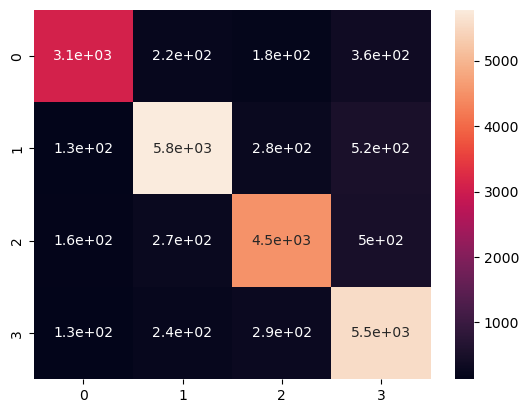

In [98]:
sns.heatmap(confusion_matrix(ytest,ypred2),annot=True)

## Validation set

In [107]:
df_val=pd.read_csv('twitter_validation.csv',header= None,names=['id','information','sentiment','text'])
df_val.head()

,id,information,sentiment,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [113]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           1000 non-null   int64 
 1   information  1000 non-null   object
 2   sentiment    1000 non-null   object
 3   text         1000 non-null   object
 4   clean_text   1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


In [115]:
df_val['sentiment'].value_counts()

Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: sentiment, dtype: int64

In [108]:
df_val["clean_text"]=df_val["text"].transform(lambda text: cleantext(text))

In [116]:
df_val['sentiment']=oe.fit_transform(df_val[['sentiment']])

In [117]:
val_test=df_val['clean_text']

In [110]:
val = tok.texts_to_sequences(val_test)
seqvaltest = sequence.pad_sequences(val, maxlen=int(max_len))

In [122]:
val_test.size

1000

In [125]:
seqvaltest.shape

(1000, 80)

In [128]:
ypred_val = lstm.predict(seqvaltest)

32/32 [==============================] - 5s 166ms/step


In [129]:
ypred_val=ypred_val.argmax(axis=1)
ypred_val.size

1000

In [130]:
#from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(df_val['sentiment'],ypred_val))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94       172
         1.0       0.95      0.95      0.95       266
         2.0       0.98      0.91      0.95       285
         3.0       0.93      0.97      0.95       277

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



Text(50.722222222222214, 0.5, 'True Lable')

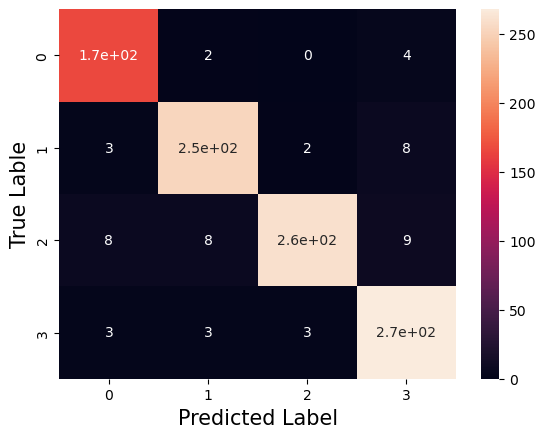

In [135]:
sns.heatmap(confusion_matrix(df_val['sentiment'],ypred_val),annot=True);
plt.xlabel('Predicted Label',size=15)
plt.ylabel('True Label',size=15)